# Laboratorio Electromagnetismo I

Jesús María Mora Mur

10 de diciembre de 2025

## Hilo infinito cargado

Importamos primero el fichero que sacamos de la aplicación _QuickField_:

In [43]:
import pandas
nombreArchivo = "hiloCarga.txt"
datos = pandas.read_csv(nombreArchivo, sep=r"\s+", skiprows=1,
                        names=["L_mm", "x_mm", "y_mm", "Nx", "Ny", "U_V", "E_V/m", "Ex",
                               "Ey", "En", "Et", "D_C/m2", "Dx", "Dy", "Dn", "Dt", "epsilon_r", "w_J/m3"]) # Encabezado fuera y nueva asignación de nombres
#sin comas.
# Extraigo las columnas que necesito.
L = datos["L_mm"]
E = datos["E_V/m"]
U = datos["U_V"]

En base a esto, calculamos el modelo teórico, siguiendo la siguiente relación para el campo eléctrico y el potencial:

In [45]:
import numpy
epsilon0 = 8.854e-12
sigmaRel = 1
y = numpy.linspace(0.04,numpy.max(L),101)
campoTeorico = sigmaRel  / (2 * numpy.pi * epsilon0 * y * 1e-3)
y0 = 1 # Posición origen de potencial en milímetros.
potencialTeorico = sigmaRel / (2 * numpy.pi * epsilon0) * numpy.log(y0/y)

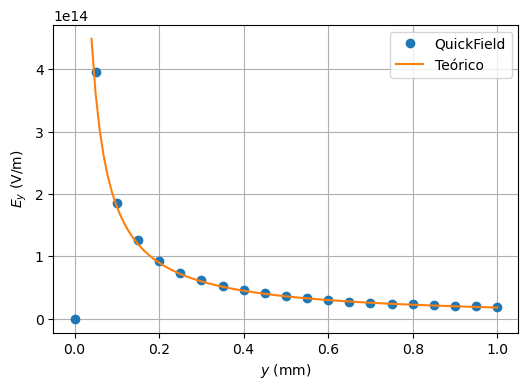

In [46]:
# Graficar
import matplotlib
import matplotlib.pyplot
matplotlib.pyplot.figure(figsize=(6,4))
matplotlib.pyplot.plot(L, E, 'o', label='QuickField')
matplotlib.pyplot.plot(y, campoTeorico, '-', label='Teórico')
matplotlib.pyplot.xlabel(r"$y$ (mm)")
matplotlib.pyplot.ylabel(r"$E_y$ (V/m)")
matplotlib.pyplot.legend()
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()

Para el caso del potencial procedemos de igual forma:

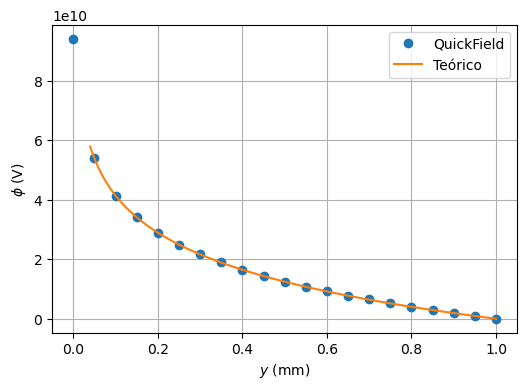

In [47]:
# Graficar
matplotlib.pyplot.figure(figsize=(6,4))
matplotlib.pyplot.plot(L, U, 'o', label='QuickField')
matplotlib.pyplot.plot(y, potencialTeorico, '-', label='Teórico')
matplotlib.pyplot.xlabel(r"$y$ (mm)")
matplotlib.pyplot.ylabel(r"$\phi$ (V)")
matplotlib.pyplot.legend()
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()

Como vemos para los dos casos ($E$ y $\phi$), la dependencia es la esperada, siendo los campos teóricos:

$$
\vec{E} = \frac{1000 \cdot \sigma_r}{2 \cdot \pi \cdot \varepsilon_0 \cdot y}
$$

$$
V = \frac{\sigma_r}{2 \cdot \pi \cdot \varepsilon_0} \cdot \log \frac{y_0}{y}
$$

## Plano inifinito cargado

Importamos primero el fichero que sacamos de la aplicación _QuickField_:

In [48]:
nombreArchivo = "planoCarga.txt"
datos = pandas.read_csv(nombreArchivo, sep=r"\s+", skiprows=1,
                        names=["L_mm", "x_mm", "y_mm", "Nx", "Ny", "U_V", "E_V/m", "Ex",
                               "Ey", "En", "Et", "D_C/m2", "Dx", "Dy", "Dn", "Dt", "epsilon_r", "w_J/m3"]) # Encabezado fuera y nueva asignación de nombres
#sin comas.
# Extraigo las columnas que necesito.
L = datos["y_mm"]
E = datos["Ey"]
U = datos["U_V"]

En base a esto, calculamos el modelo teórico, siguiendo la siguiente relación para el campo eléctrico y el potencial:

In [49]:
epsilon0 = 8.854e-12
sigmaRel = 1
y = numpy.linspace(numpy.min(L),numpy.max(L),101)
campoTeorico = sigmaRel  / (2 * epsilon0) * numpy.sign(y)
y0 = -5 # Posición origen de potencial en milímetros.
potencialTeorico = (-sigmaRel / (2 * epsilon0)) * (numpy.abs(y) - numpy.abs(y0)) * 1e-3

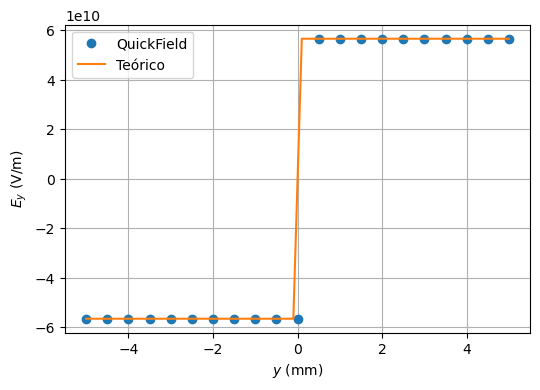

In [50]:
# Graficar
import matplotlib
import matplotlib.pyplot
matplotlib.pyplot.figure(figsize=(6,4))
matplotlib.pyplot.plot(L, E, 'o', label='QuickField')
matplotlib.pyplot.plot(y, campoTeorico, '-', label='Teórico')
matplotlib.pyplot.xlabel(r"$y$ (mm)")
matplotlib.pyplot.ylabel(r"$E_y$ (V/m)")
matplotlib.pyplot.legend()
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()

Para el caso del potencial procedemos de igual forma:

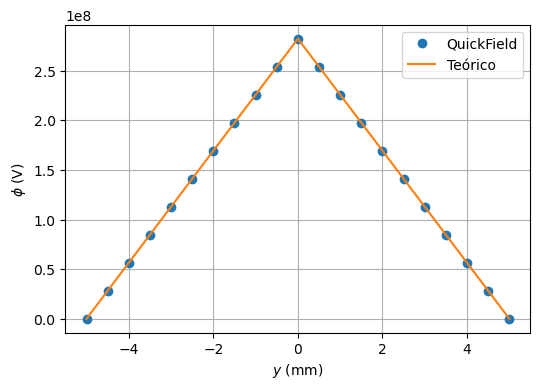

In [51]:
# Graficar
matplotlib.pyplot.figure(figsize=(6,4))
matplotlib.pyplot.plot(L, U, 'o', label='QuickField')
matplotlib.pyplot.plot(y, potencialTeorico, '-', label='Teórico')
matplotlib.pyplot.xlabel(r"$y$ (mm)")
matplotlib.pyplot.ylabel(r"$\phi$ (V)")
matplotlib.pyplot.legend()
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()

Los valores teóricos son los siguientes:

$$
\vec{E} = \text{sign}\: y \cdot \frac{\sigma}{2 \cdot \varepsilon_0}
$$

donde $\text{sign} \: y$ se refiere a la función signo valorada para $y$. Por otro lado, para el caso del potencial:

$$
V = -\frac{\sigma}{2 \cdot \varepsilon_0} \cdot \left(\lvert y \rvert - \lvert y_0 \rvert \right)
$$

Vemos claramente la coherencia entre resultados y la dependencia de la posición, así como de la densidad $\sigma$.

## Condensador con dos medios distintos.

Para este caso, sacaremos los gráficos que genera el programa después de analizar el sistema. Nótese que tenemos un medio con $\varepsilon_r = 1$ y otro con $\varepsilon_r = 2$:

- Para el caso del campo $\vec{E}$

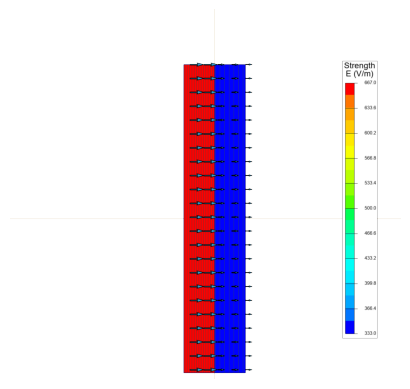

In [52]:
import matplotlib
from matplotlib import image, pyplot
imagen = image.imread("condensadorE.png")
matplotlib.pyplot.imshow(imagen)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.show()

Vemos la discontinuidad al cambiar de medio. Como la permitividad relativa es más alta, el campo disminuye para trnasmitir la misma carga.

- Para el caso del campo $\vec{D}$:

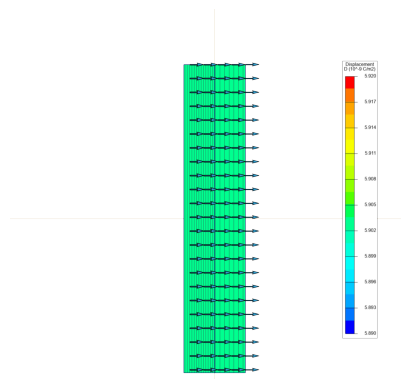

In [53]:
import matplotlib
from matplotlib import image, pyplot
imagen = image.imread("condensadorD.png")
matplotlib.pyplot.imshow(imagen)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.show()

Como vemos el campo $\vec{D}$ es constante dentro del condensador.

Por otro lado, para calcular la capacidad del condensador utilizamos el dato de la aplicación _QuickField_. Generamos un contorno en el que quede una de las placas completamente inmersa. Pulsamos en _Integral values_ y comprobamos que el valor que arroja es $5.90270 \cdot 10^{-13} \: \text{C}$.

El valor teórico de la capacidad viene dado por la siguiente expresión:
$$
C = \frac{Q}{\Delta V}
$$

Como $\Delta V = 1 \: \text{V}$, nuestra capacidad es $5.90270 \cdot 10^{-13} \: \text{F}$.

## Espira circular

Importamos primero el fichero que sacamos de la aplicación _QuickField_:

In [54]:
import pandas
nombreArchivo = "espira.txt"
datos = pandas.read_csv(nombreArchivo, sep=r"\s+", skiprows=1,
                        names=["L_mm", "z_mm", "r_mm", "Nx", "Ny", "rA_Wb", "B_T", "Bz",
                               "Br", "Bn", "Bt", "H_A/m", "Hz", "Hr", "Hn", "Ht", "m", "w_J/m3"]) # Encabezado fuera y nueva asignación de nombres
#sin comas.
# Extraigo las columnas que necesito.
L = datos["z_mm"]
Bz = datos["Bz"]

In [55]:
import numpy
mu0 = 4 * numpy.pi * 1e-7
intensidadEspira = 1 # Amperios
z = numpy.linspace(numpy.min(L),numpy.max(L),101)
radioEspira = 8 #  milímetros
campoZTeorico = mu0 * intensidadEspira * (radioEspira * 1e-3)**2 / 2 / ((z * 1e-3)**2 + (radioEspira * 1e-3)**2)**(3/2)

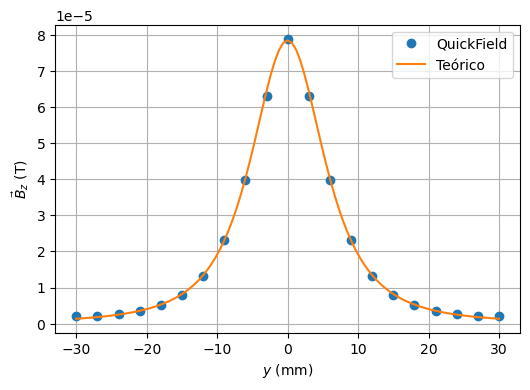

In [56]:
# Graficar
import matplotlib
import matplotlib.pyplot
matplotlib.pyplot.figure(figsize=(6,4))
matplotlib.pyplot.plot(L, Bz, 'o', label='QuickField')
matplotlib.pyplot.plot(z, campoZTeorico, '-', label='Teórico')
matplotlib.pyplot.xlabel(r"$y$ (mm)")
matplotlib.pyplot.ylabel(r"$\vec{B}_z$ (T)")
matplotlib.pyplot.legend()
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()

Como vemos los datos de _QuickField_ se ajustan a los teóricos, dados por la expresión siguiente:

$$
\vec{B}_z = \frac{\mu_0 \cdot I \cdot r^2}{2 \cdot \left(z^2 + r^2\right)^\frac{3}{2}}
$$